# Final Project Overview and Tasks

**==========================================================================================================**

**==========================================================================================================**

## Project Description / Business Task

Download the dataset provided and complete the tasks given below. You will then submit the completed worksheet and answer questions based on the tasks. When you submit your project, you will need to review the projects of three of your peers.

## Data sources

You've been hired as a BI analyst by a supermarket chain. The management wants to analyze the probability distribution of revenue over the last three years, compare region-wise and product-wise revenue, and also find trends in the monthly revenue.

You've been provided with sales data for a store in the supermarket chain for the years 2021, 2022, and 2023, including information on sales transactions, product categories, and customer demographics.

In this assignment, you will:

    Calculate the measures of central tendency: Mean, median, and mode.
    Calculate the measures of dispersion: Standard deviation and variance.
    Find the minimum, maximum, percentiles, and quartiles.
    Create a histogram.
    Create a pivot table.
    Perform a multiple linear regression and interpret the outcome.

## Data Tasks

For tasks 1 to 6, access the dataset in the sales_data worksheet. For task 7, use the dataset in the monthly_sales worksheet.


**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import statistics
from collections import Counter
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("supermarketsales.csv")

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2021,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2021,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2021,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2021,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2021,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14059 entries, 0 to 14058
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction         14059 non-null  int64  
 1   Purchase Date       14059 non-null  int64  
 2   Customer ID         14059 non-null  int64  
 3   Gender              14059 non-null  object 
 4   Marital Status      14059 non-null  object 
 5   Homeowner           14059 non-null  object 
 6   Children            14059 non-null  int64  
 7   Annual Income       14059 non-null  object 
 8   City                14059 non-null  object 
 9   State or Province   14059 non-null  object 
 10  Country             14059 non-null  object 
 11  Product Family      14059 non-null  object 
 12  Product Department  14059 non-null  object 
 13  Product Category    14059 non-null  object 
 14  Units Sold          14059 non-null  int64  
 15  Revenue             14059 non-null  float64
dtypes: f

In [5]:
df.dtypes.value_counts()

object     10
int64       5
float64     1
dtype: int64

In [6]:
#1 Measures of central tendency: Calculate the mean, median, and mode of the revenue earned in each of the years 2021, 2022, and 2023.

In [7]:
df["Purchase Date"].unique()

array([2021, 2022, 2023], dtype=int64)

In [8]:
df2021 = df[df["Purchase Date"] == 2021]
df2021.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2021,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2021,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2021,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2021,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2021,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00


In [9]:
df2021.Revenue.describe()

count   35.00
mean    11.38
std      5.98
min      1.43
25%      7.00
50%     11.82
75%     14.63
max     27.38
Name: Revenue, dtype: float64

In [10]:
statistics.mode(df2021.Revenue)

8.74

In [11]:
df2022 = df[df["Purchase Date"] == 2022]
df2022.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
35,36,2022,240,M,M,N,2,$30K - $50K,Los Angeles,CA,USA,Food,Produce,Fruit,2,8.42
36,37,2022,6510,F,M,Y,0,$50K - $70K,Salem,OR,USA,Food,Produce,Vegetables,5,7.23
37,38,2022,7570,M,M,Y,4,$70K - $90K,Salem,OR,USA,Non-Consumable,Health and Hygiene,Bathroom Products,3,6.07
38,39,2022,4686,F,S,N,2,$50K - $70K,Los Angeles,CA,USA,Non-Consumable,Household,Electrical,5,11.90
39,40,2022,6207,M,M,N,1,$30K - $50K,Los Angeles,CA,USA,Drink,Dairy,Dairy,5,13.16


In [12]:
df2022.Revenue.describe()

count   4692.00
mean      12.90
std        8.09
min        0.62
25%        6.72
50%       11.16
75%       17.38
max       53.19
Name: Revenue, dtype: float64

In [13]:
statistics.mode(df2022.Revenue)

5.04

In [14]:
df2023 = df[df["Purchase Date"] == 2023]
df2023.head()

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
4727,4728,2023,4422,F,M,Y,3,$30K - $50K,Los Angeles,CA,USA,Food,Starchy Foods,Starchy Foods,2,11.68
4728,4729,2023,6712,M,M,Y,3,$110K - $130K,Spokane,WA,USA,Food,Baking Goods,Jams and Jellies,5,4.62
4729,4730,2023,2217,F,S,Y,4,$110K - $130K,Seattle,WA,USA,Food,Snack Foods,Snack Foods,4,12.77
4730,4731,2023,5295,M,S,Y,3,$30K - $50K,Spokane,WA,USA,Food,Produce,Vegetables,5,2.77
4731,4732,2023,3639,F,M,Y,2,$30K - $50K,San Diego,CA,USA,Food,Snack Foods,Snack Foods,5,7.13


In [15]:
df2023.Revenue.describe()

count   9332.00
mean      13.06
std        8.29
min        0.53
25%        6.91
50%       11.28
75%       17.37
max       56.70
Name: Revenue, dtype: float64

In [16]:
statistics.mode(df2023.Revenue)

7.56

In [17]:
#2 Measures of dispersion: Calculate the variance and standard deviation for the revenue earned in 2021

In [18]:
df2021.Revenue.var(), df2021.Revenue.std()

(35.717896974789916, 5.976445178765544)

In [19]:
#3 Minimum and maximum: Calculate the minimum and maximum revenues from 2021 to 2023.

In [20]:
df.Revenue.min(), df.Revenue.max()

(0.53, 56.7)

In [21]:
#4 Quartiles and percentiles: Calculate the following quartiles and percentiles:

In [22]:
# Calculate quartiles
first_quartile = np.percentile(df2021.Revenue, 25)
second_quartile = np.percentile(df2021.Revenue, 50)  # Median
third_quartile = np.percentile(df2021.Revenue, 75)

In [23]:
first_quartile, second_quartile, third_quartile

(7.0, 11.82, 14.629999999999999)

In [24]:
# Calculate percentiles
percentiles = [1, 5, 50, 75, 95, 99]
percentile_values = np.percentile(df2021.Revenue, percentiles)

In [25]:
print("\nPercentiles of the 2021 revenue:")
for p, value in zip(percentiles, percentile_values):
    print(f"{p} percentile:", value)


Percentiles of the 2021 revenue:
1 percentile: 1.7632
5 percentile: 3.117
50 percentile: 11.82
75 percentile: 14.629999999999999
95 percentile: 20.135999999999996
99 percentile: 25.42159999999998


In [26]:
#5 Histogram: Create a histogram showing the probability distribution of revenue from 2021 to 2023.

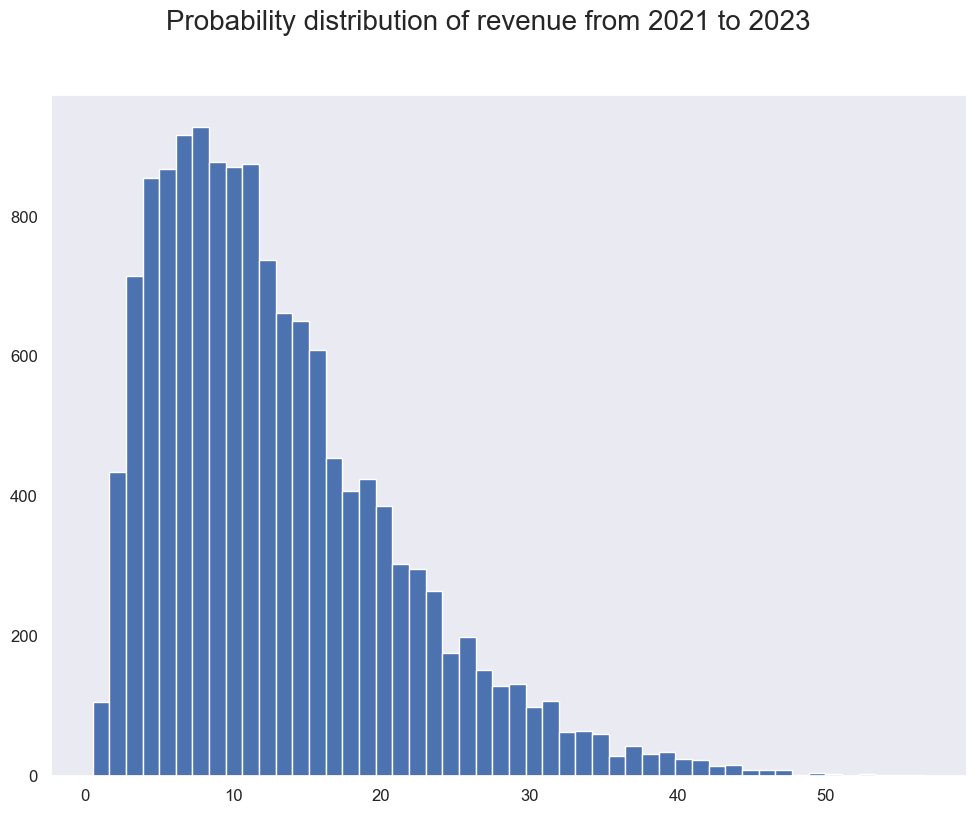

In [27]:
df.Revenue.hist(bins=50, figsize=(10, 8), grid=False)
plt.suptitle('Probability distribution of revenue from 2021 to 2023', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [28]:
#6 Pivot charts: Create two pivot charts in two separate worksheets to demonstrate the following:
#  Show the revenue generated in each country and city during the period from 2021 to 2023. 
#  Name the Worksheet, Pivot_chart_a. Find out which country grosses the least revenue? (Canada)

In [29]:
# Create a pivot table
pivot_table1 = df.pivot_table(index=['Country', 'City'], columns='Purchase Date', values='Revenue', aggfunc='sum')

In [30]:
pivot_table1

Purchase Date          2021    2022     2023
Country City                                
Canada  Vancouver       NaN  112.42  8552.58
        Victoria        NaN   29.54  2372.49
Mexico  Acapulco        NaN   33.24  5128.07
        Camacho         NaN   75.06  5722.39
        Guadalajara     NaN     NaN   523.32
        Hidalgo         NaN   65.20 11247.57
        Merida          NaN   98.46  8641.99
        Mexico City     NaN     NaN  2488.31
        Orizaba         NaN  162.65  6082.57
        San Andres      NaN   41.89  8164.16
USA     Bellingham    21.59  509.20   461.84
        Beverly Hills 77.40 4927.42  5315.35
        Bremerton      5.52 5221.51  5747.86
        Los Angeles   51.02 6528.91  5716.24
        Portland      42.92 5659.90  6223.78
        Salem         49.85 9477.28  8684.71
        San Diego     76.82 5593.27  5699.68
        San Francisco  4.49  384.60   355.21
        Seattle         NaN 5667.92  6484.47
        Spokane         NaN 5115.39  6118.65
        Tacoma        34.16 7824.27  8972.72
        Walla Walla     NaN  502.66   661.94
        Yakima        34.59 2499.93  2535.45

## Which country generates the least revenue? (Canada)

In [31]:
# Show the average revenue generated by each product family in each country and city.
# Name the worksheet 'Pivot_chart_b.'

In [32]:
pivot_table2 = df.pivot_table(index=['Country', 'City'], columns='Product Family', values='Revenue', aggfunc='mean')

In [33]:
pivot_table2

Product Family         Drink  Food  Non-Consumable
Country City                                      
Canada  Vancouver      13.00 13.98           12.90
        Victoria       12.87 14.15           12.38
Mexico  Acapulco       14.89 13.49           12.59
        Camacho        11.67 13.24           11.79
        Guadalajara     6.90  6.68            8.30
        Hidalgo        11.83 13.51           13.68
        Merida         12.27 13.38           13.76
        Mexico City    17.51 12.62           11.78
        Orizaba        12.99 13.27           14.29
        San Andres     14.20 13.16           12.99
USA     Bellingham      6.53  7.21            6.31
        Beverly Hills  11.81 12.86           12.66
        Bremerton      12.81 13.37           12.39
        Los Angeles    12.50 13.13           14.21
        Portland       12.31 13.69           13.88
        Salem          12.13 13.41           12.62
        San Diego      14.93 12.89           13.01
        San Francisco   8.72  5.35            5.26
        Seattle        13.94 13.09           13.12
        Spokane        11.86 13.06           12.50
        Tacoma         12.83 13.48           13.28
        Walla Walla     7.22  7.35            7.03
        Yakima         14.32 13.38           13.52

**==========================================================================================================**

**==========================================================================================================**

In [34]:
# Multiple linear regression:

#a. Use the dataset in the monthly_sales worksheet. The data sheet shows the monthly sales in 2021, 2022, and 2023. Find how the 2023 sales revenue depends on the monthly sales in 2021 and 2022 using multiple linear regression. Use the XLMiner Analysis Toolpak add-in to perform the regression analysis. (If you are using the desktop version of Excel, you may use the Data Analysis Toolpak available in the add-in.) The regression summary must be displayed in the same worksheet.

#b. Interpret the output. During your submission, you will record the R-squared value, Significance F of the models, and p-values for each independent variable and explain what these values signify.


In [35]:
df2 = pd.read_csv("monthly_sales.csv")
df2

,Month,2021Sales,2022Sales,2023Sales
0,January,47.80,5110.92,9877.97
1,February,22.81,5056.59,10243.35
2,March,23.53,4888.17,10329.64
3,April,35.23,5024.49,10371.28
4,May,51.74,4792.85,10248.42
5,June,38.81,5198.42,10243.03
6,July,32.33,419.79,10198.81
7,August,31.33,5125.88,10367.29
8,September,32.68,5230.95,10140.83
9,October,127.94,5160.45,9876.70


In [36]:
df2.columns

Index(['Month', '2021Sales', '2022Sales', '2023Sales'], dtype='object')

## What are the dependent and independent variables?
'2021Sales', '2022Sales' are Independent variables

'2023Sales' is Dependent variable

In [37]:
# Prepare the data
X = df2[['2021Sales', '2022Sales']]  # Independent variables
y = df2['2023Sales']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              2023Sales   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1.685
Date:                Tue, 20 Feb 2024   Prob (F-statistic):              0.239
Time:                        20:08:23   Log-Likelihood:                -76.797
No. Observations:                  12   AIC:                             159.6
Df Residuals:                       9   BIC:                             161.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.03e+04    188.689     54.576      0.0

## What part of the variance in the 2023 Sales is explained by the model?

R-squared value

## Is the model as a whole statistically significant?

No, as both p-values more than 0.05

## Is each independent variable statistically independent?

The p-values associated with some coefficients are not significant, it suggests that those independent variables may not be making a unique or statistically significant contribution to explaining the variation in the dependent variable, given the other independent variables in the model.

**==========================================================================================================**

#### Python code done by Dennis Lam